<a href="https://colab.research.google.com/github/playitsaiff/DES-/blob/master/airreview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy

In [5]:
from google.colab import files
uploaded = files.upload()

Saving airdata.xlsx to airdata.xlsx


In [0]:
df = pd.read_excel("airdata.xlsx")

In [7]:
import nltk
nltk.download ("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**Changing the recommended column from (yes or no ) to (0 or 1) respectively.**

In [0]:
df["recommended"]=df["recommended"].apply(lambda x: 0 if x=="no" else 1)

In [9]:
(len(df)-df.count())/len(df)

airline_name               0.000000
name                       0.000000
country                    0.000000
content                    0.000000
type_of_traveller          0.590574
cabin_flown                0.000000
date_flown                 0.592047
seat_comfort               0.136966
cabin_staff_service        0.139912
food_beverages             0.282769
value_for_money            0.004418
recommended                0.000000
inflight_entertaintment    0.506627
overall_rating             0.047128
dtype: float64

In [0]:
del df["type_of_traveller"]
del df["date_flown"]
del df["inflight_entertaintment"]


In [0]:
df=df.fillna(df.mean())

In [0]:
Mood_count=df["recommended"].value_counts()

In [13]:
Mood_count

1    423
0    256
Name: recommended, dtype: int64

Text(0.5, 1.0, 'count of Moods')

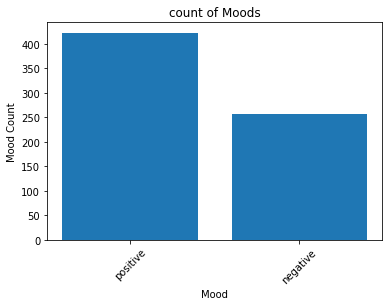

In [14]:
Index=[0,1]
plt.bar(Index,Mood_count)
plt.xticks(Index,["positive","negative"],rotation=45)
plt.xlabel('Mood')
plt.ylabel("Mood Count")
plt.title("count of Moods")

In [0]:
df=df.drop_duplicates({"name","country","content"},keep="first")

([<matplotlib.axis.XTick at 0x7f3d9617bd30>,
 <a list of 29 Text xticklabel objects>)

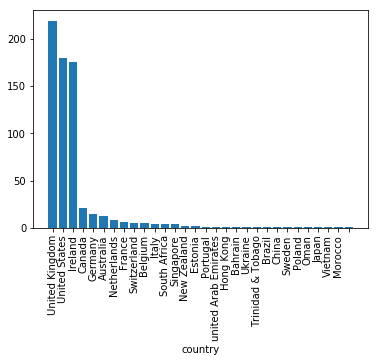

In [16]:
plt.bar([i for i in range(len(df["country"].value_counts()))],df["country"].value_counts())
plt.xlabel('country')
plt.xticks([i for i in range(len(df["country"].value_counts()))],["United Kingdom",
"United States",
"Ireland",
"Canada",
"Germany",                  
"Australia",                
"Netherlands",              
"France",                    
"Switzerland",               
"Belgium",                   
"Italy",                     
"South Africa",              
"Singapore",                 
"New Zealand",               
"Estonia",                   
"Portugal",                  
"united Arab Emirates",      
"Hong Kong",                 
"Bahrain",                   
"Ukraine",                   
"Trinidad & Tobago",         
"Brazil",                    
"China",                     
"Sweden",                    
"Poland",
"Oman",
"Japan",
"Vietnam",
"Morocco"],rotation=90)

([<matplotlib.axis.XTick at 0x7f3d960bab38>,
 <a list of 3 Text xticklabel objects>)

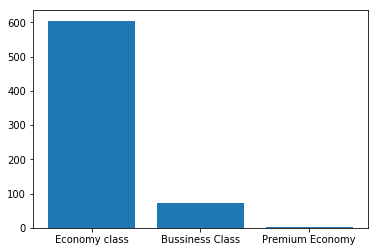

In [17]:
plt.bar([0,1,2],df["cabin_flown"].value_counts())
plt.xticks([0,1,2],["Economy class","Bussiness Class","Premium Economy"])

In [0]:
from wordcloud import WordCloud,STOPWORDS

In [0]:
df_neg=df[df["recommended"]==0]

In [0]:
words=" ".join(df_neg["content"])
cleaned_word_neg = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                                and word != "Aer"
                                and word != "Lingus"
                                
                            ])


In [0]:
wordcloud_neg = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word_neg)

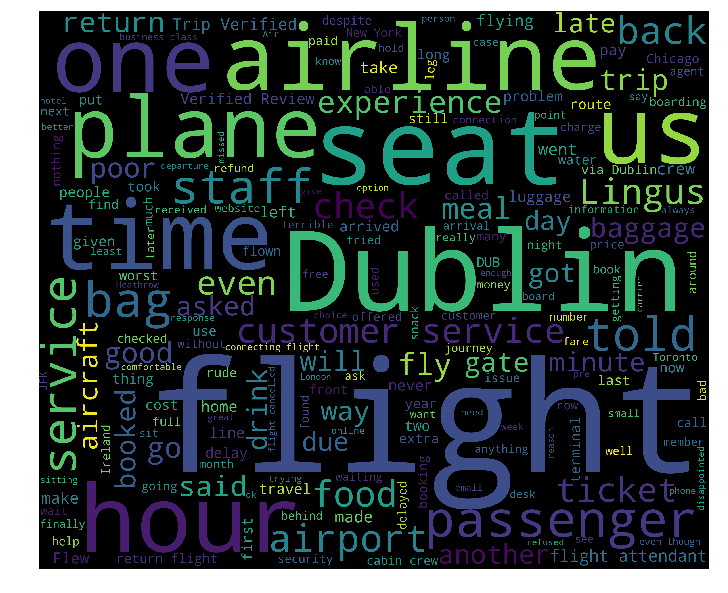

In [22]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_neg)
plt.axis('off')
plt.show()

In [0]:
df_pos=df[df["recommended"]==1]

In [0]:
words=" ".join(df_pos["content"])
cleaned_word_pos = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                                and word != "Aer"
                                and word != "Lingus"
                                
                            ])

In [0]:
wordcloud_pos = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word_pos)

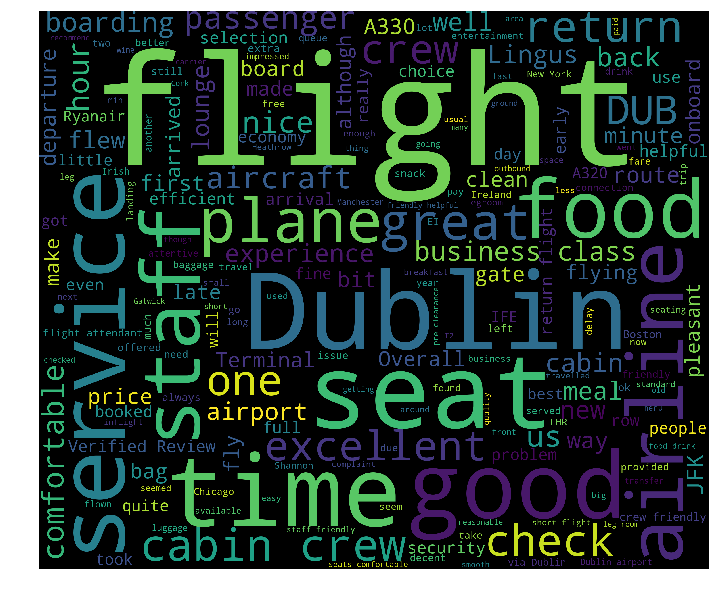

In [26]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_pos)
plt.axis('off')
plt.show()

In [0]:
import re
import nltk
from nltk.corpus import stopwords

In [0]:
def review_to_words(review):
    letters_only = re.sub("[^a-zA-Z]", " ",review) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words ))

In [0]:
def review_length(review):
    letters_only = re.sub("[^a-zA-Z]", " ",review) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words))

In [0]:

df['clean_review']=df['content'].apply(lambda x: review_to_words(x))
df['review_length']=df['content'].apply(lambda x: review_length(x))
train,test = train_test_split(df,test_size=0.2,random_state=42)


In [0]:
df.drop("airline_name",axis=1,inplace=True)

In [32]:
train

,airline_name,name,country,content,cabin_flown,seat_comfort,cabin_staff_service,food_beverages,value_for_money,recommended,overall_rating,clean_review,review_length
431,Aer Lingus,Mary Howe,United States,We flew Boston to Dublin and back. Flight 136 ...,Economy Class,5.000000,5.000000,5.000000,5.0,1,10.000000,flew boston dublin back flight sep flight sep ...,19
249,Aer Lingus,9 reviewsAdam Brown,United Kingdom,In transit from JFK I was a little nervous abo...,Business Class,4.000000,5.000000,2.000000,4.0,1,6.000000,transit jfk little nervous duty free transfer ...,76
220,Aer Lingus,K Scott,Ireland,Chicago to Dublin with Aer Lingus in Business ...,Business Class,5.000000,5.000000,5.000000,5.0,1,10.000000,chicago dublin aer lingus business class excel...,39
18,Aer Lingus,Thomas Fitzgerald,Ireland,"Not Verified | Terrible customer service, rud...",Economy Class,3.000000,3.000000,3.195072,1.0,0,1.000000,verified terrible customer service rude unhelp...,114
244,Aer Lingus,L Emery,United States,"Chicago to Dublin return with Aer Lingus, and ...",Economy Class,1.000000,1.000000,1.000000,1.0,0,1.000000,chicago dublin return aer lingus worst airline...,77
531,Aer Lingus,P McCracken,Ireland,DUB - LPA Return. All flights on time. Flights...,Economy Class,4.000000,5.000000,4.000000,4.0,1,9.000000,dub lpa return flights time flights comfortabl...,23
204,Aer Lingus,Ian Gallagher,Ireland,Recently booked a return trip from Shannon to ...,Economy Class,4.000000,5.000000,5.000000,4.0,1,9.000000,recently booked return trip shannon boston sho...,120
61,Aer Lingus,47 reviewsColin Pay,United Kingdom,✅ Trip Verified | I flew Dublin To Boston ret...,Economy Class,5.000000,5.000000,5.000000,5.0,1,10.000000,trip verified flew dublin boston return aer li...,40
155,Aer Lingus,J Fox,Ireland,✅ Verified Review | Outbound flight with Aer ...,Economy Class,5.000000,5.000000,5.000000,5.0,1,10.000000,verified review outbound flight aer lingus cre...,75
361,Aer Lingus,E Deller,United States,Have taken Aer Lingus from the US (Chicago and...,Economy Class,4.000000,5.000000,3.000000,5.0,1,6.000000,taken aer lingus us chicago ny several times i...,52


In [0]:
train_clean_review=[]
for review in train['clean_review']:
    train_clean_review.append(review)
test_clean_review=[]
for review in test['clean_review']:
    test_clean_review.append(review)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_review)
test_features=v.transform(test_clean_review)

In [35]:
train_features

<542x4625 sparse matrix of type '<class 'numpy.int64'>'
	with 30003 stored elements in Compressed Sparse Row format>

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [0]:
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB()]

In [38]:
dense_test= test_features.toarray()
dense_features=train_features.toarray()
Accuracy=[]
Model=[]
y=train["recommended"]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train["recommended"])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train["recommended"])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test["recommended"])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))    


Accuracy of LogisticRegressionis 0.5882352941176471
Accuracy of KNeighborsClassifieris 0.6102941176470589


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVCis 0.5808823529411765
Accuracy of DecisionTreeClassifieris 0.8014705882352942
Accuracy of RandomForestClassifieris 0.7867647058823529
Accuracy of AdaBoostClassifieris 0.8088235294117647
Accuracy of GaussianNBis 0.6985294117647058


Text(0.5, 1.0, 'Accuracies of Models')

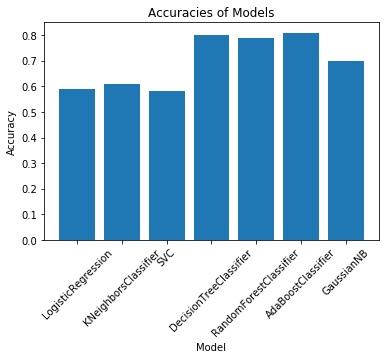

In [39]:
Index = [1,2,3,4,5,6,7]
plt.bar(Index,Accuracy)
plt.xticks(Index, Model,rotation=45)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')

In [47]:

svm = SVC(C=0.25,kernel="linear",probability=True)
# learning an SVM on the scaled training data
svm.fit(train_features,train['recommended'])
# scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format(
bsvm.score(test_features,test["recommended"])))

Scaled test set accuracy: 0.81


In [48]:
train_features


<542x4625 sparse matrix of type '<class 'numpy.int64'>'
	with 30003 stored elements in Compressed Sparse Row format>

**bagging svm**

In [51]:
from sklearn.ensemble import BaggingClassifier
bsvm=BaggingClassifier(base_estimator=SVC(C=0.1, cache_size=200, class_weight=None,
                                     coef0=0.0, decision_function_shape='ovr',
                                     degree=3, gamma='auto_deprecated',
                                     kernel='linear', max_iter=-1,
                                     probability=True, random_state=None,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=False, max_features=1800,
                  max_samples=0.8, n_estimators=25, n_jobs=None,
                  oob_score=False, random_state=314, verbose=0,
                  warm_start=False)
bsvm.fit(train_features,train['recommended'])
print("Scaled test set accuracy: {:.2f}".format(
bsvm.score(test_features,test["recommended"])))

Scaled test set accuracy: 0.81


adaboost with svm

In [0]:
#applying boosting svm
from sklearn.ensemble import AdaBoostClassifier
asvm=AdaBoostClassifier(base_estimator=SVC(C=0.01,kernel="linear",probability=True),algorithm='SAMME.R',n_estimators=15,random_state=314,learning_rate=0.5)

In [85]:
asvm.fit(train_features,train['recommended'])

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=SVC(C=0.01, cache_size=200, class_weight=None,
                                      coef0=0.0, decision_function_shape='ovr',
                                      degree=3, gamma='auto_deprecated',
                                      kernel='linear', max_iter=-1,
                                      probability=True, random_state=None,
                                      shrinking=True, tol=0.001,
                                      verbose=False),
                   learning_rate=0.5, n_estimators=15, random_state=314)

In [86]:
print("Scaled test set accuracy: {:.2f}".format(
asvm.score(test_features,test["recommended"])))

Scaled test set accuracy: 0.82
